# Исследование объявлений о продаже квартир

Целью настоящего исследования является разработка критериев для автоматического определения рыночной стоимости объектов недвижимости. Материалом для исследования служит архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет от сервиса Яндекс.Недвижимость. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Задачи исследования:
1. Изучить влияние на цену квартиры следующих параметров: площадь, число комнат, высота потолков, этажность, расположение. Выявить факторы с наибольшим влиянием на стоимость квартиры.
2. Выяснить, влияет ли дата размещения объявления на стоимость квартиры, выявить сезонные тенденции.
3. Определить наличие разницы в определяющих факторах для квартир в центре города и в удаленных районах.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади-квартиры" data-toc-modified-id="Анализ-площади-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ площади квартиры</a></span></li><li><span><a href="#Анализ-стоимости-квартиры" data-toc-modified-id="Анализ-стоимости-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ стоимости квартиры</a></span></li><li><span><a href="#Анализ-количества-комнат" data-toc-modified-id="Анализ-количества-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ количества комнат</a></span></li><li><span><a href="#Анализ-высоты-потолков" data-toc-modified-id="Анализ-высоты-потолков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ высоты потолков</a></span></li><li><span><a href="#Анализ-времени-продажи-квартиры" data-toc-modified-id="Анализ-времени-продажи-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ времени продажи квартиры</a></span></li><li><span><a href="#Анализ-факторов,-влияющих-на-формирование-цены" data-toc-modified-id="Анализ-факторов,-влияющих-на-формирование-цены-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ факторов, влияющих на формирование цены</a></span></li><li><span><a href="#Анализ-стоимости-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-стоимости-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ стоимости квартир в центре Санкт-Петербурга</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40) #настроим отображение всех столбцов

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открытие файла
#поскольку данные в файле разделены не запятой, а символом табуляции, указываем это в аргументе sep

In [4]:
df.sample(5, random_state=1) #выведем случайные 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,False,False,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,False,False,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,False,False,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,False,False,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,False,False,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0


In [5]:
df.info() #вызовем краткую сводку по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm') 
#посчитаем долю пропусков в каждом столбце, округлив её для наглядности

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


In [7]:
df.describe() #посмотрим на некоторые статистические показатели

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

По результатам первичного анализа предоставленных данных мы обнаружили значительное количество пропусков. Наиболее часто пропущенные значения встречаются в столбце is_apartment (88.29%) и автоматически полученных данных о ближайших парках и водоемах, также привлекает внимание недостаток информации по количеству балконов и высоте потолков. Кроме того, в данных встречаются аномальные значения (например, высота потолков в квартире 1 м и 100 м), похожие на выбросы. До того, как переходить к дальнейшему анализу, эти данные необходимо по возможности обработать.

## Предобработка данных

Подумаем, чем мы можем заполнить пропущенные значения. Предположим, что пропуски в столбце "количество балконов" означают их отсутствие, и заменим их нулями.

In [8]:
df['balcony'] = df['balcony'].fillna(0)

Предположим, что отсутствие информации в столбце "апартаменты" означает принадлежность объекта недвижимости к жилому фонду, и заменим пропуски на False. Этим же изменим строковый тип столбца на булевый.

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [10]:
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm') 
#проверим работу замены

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,0


Удалось полностью избавиться от пропусков в столбцах balcony и is_apartment. Количество пропусков в столбце ceiling_height достаточно большое (38.8%), они могли возникнуть из-за того, что продавец квартиры не знал точного значения. Хотя высота потолков в многоквартирных домах - величина типовая, мы не можем вычислить её на основании других столбцов, поэтому для точности расчётов правильнее оставить эти пропуски незаполненными. У нас также есть строки, где не указано название населенного пункта. Проверим, какие вообще варианты встречаются в данном столбце.

In [11]:
df['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Возрождение           1
поселок Перово                1
деревня Мануйлово             1
деревня Кисельня              1
посёлок Высокоключевой        1
Name: locality_name, Length: 364, dtype: int64

Список названий населенных пунктов внушительный - целых 364, и в нём, судя по всему, есть дубликаты: например, различающиеся одной буквой "посёлок Пансионат Зелёный Бор" и "поселок Пансионат Зелёный Бор". Мы не можем достоверно восстановить пропущенные названия на основе других данных, но можем избавиться от дубликатов с помощью замены.

In [12]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [13]:
df['locality_name'].value_counts()

Санкт-Петербург       15721
поселок Мурино          556
поселок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
деревня Куровицы          1
деревня Русско            1
поселок Белоостров        1
деревня Хязельки          1
деревня Зимитицы          1
Name: locality_name, Length: 330, dtype: int64

In [14]:
df.duplicated().sum() #проверим, не возникло ли полных дубликатов среди объявлений

0

Было обнаружено много пропусков в автоматически заполненных значениях: расстояния до аэропорта, парка, водоёма. Они могли возникнуть, если в объявлении не было указано точного адреса или по имеющемуся адресу на карте не было подходящих объектов - например, для квартиры из деревни Старое Хинколово отсутствие информации об аэропорте, парках и прудах вполне ожидаемо. У нас нет возможности перепроверить картографические данные, поэтому оставим эти столбцы в таком виде, как есть.

Преобразуем типы данных в других столбцах: "дату публикации" переведём в формат даты, количество балконов - в целочисленный тип (поскольку это значение не может быть дробным).

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
df['balcony'] = df['balcony'].apply(int)

In [17]:
df.info() #снова посмотрим на краткую сводку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

### Вывод

Мы заполнили пропуски, где это было возможно сделать на основании других данных (в столбцах balcony и is_apartment получилось полностью избавиться от пропущенных значений). Также мы преобразовали данные в более подходящие типы: is_apartment - в булевый, balcony - в целочисленный, first_day_exposition - в формат даты. Полных дубликатов в датафрейме обнаружено не было, но мы вручную сократили количество названий населённых пунктов с 364 до 330 за счёт замены буквы "ё" на "е".

## Расчёты и добавление результатов в таблицу

Для продолжения анализа нам нужно добавить в исходный датафрейм некоторые параметры:
- чтобы сравнить стоимость квартир с разной площадью, нужно вычислить цену одного квадратного метра;
- важным параметром при выборе квартиры является её размер, особенно площадь комнат и кухни, поэтому дополнительно вычислим соотношение жилой и общей площади, а также отношение площади кухни к общей;
- для оценки влияния сезонных факторов вытащим из даты публикации объявления день недели, месяц и год;
- объединим квартиры в категории по этажности: "первый", "последний" или "другой".

In [18]:
df['price_per_m2'] = df['last_price'] / df['total_area'] #добавим цену за квадратный метр

In [19]:
df['living_ratio'] = df['living_area'] / df['total_area'] *100 #соотношение жилой и общей площади

In [20]:
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] *100 #отношение площади кухни к общей

In [21]:
df['weekday'] = df['first_day_exposition'].dt.weekday #добавим день недели

In [22]:
df['month'] = df['first_day_exposition'].dt.month #добавим месяц

In [23]:
df['year'] = df['first_day_exposition'].dt.year #добавим год

In [24]:
def floor_category(row): #напишем функцию для категоризации этажей
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

In [25]:
df['floor_category'] = df.apply(floor_category, axis=1) #применим нашу функцию

In [26]:
df.sample(5, random_state=1) #снова выведем 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,living_ratio,kitchen_ratio,weekday,month,year,floor_category
17338,5,3300000.0,47.0,2018-03-30,1,3.00,10.0,NaN,4,False,False,False,NaN,0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0,70212.765957,NaN,NaN,4,3,2018,другой
13876,12,2290000.0,40.0,2016-01-17,2,3.00,3.0,27.0,2,False,False,False,7.4,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0,57250.000000,67.500000,18.500000,6,1,2016,другой
3586,0,5450000.0,53.8,2018-02-01,2,2.85,2.0,36.5,2,False,False,False,5.3,1,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0,101301.115242,67.843866,9.851301,3,2,2018,последний
6495,1,5482990.0,66.1,2016-02-19,2,NaN,25.0,43.6,1,False,False,False,11.1,0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0,82949.924357,65.960666,16.792738,4,2,2016,первый
14431,5,4190000.0,54.0,2017-10-30,2,3.00,12.0,34.0,3,False,False,False,9.0,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0,77592.592593,62.962963,16.666667,0,10,2017,другой


### Вывод

Мы провели дополнительные расчёты и добавили в датафрейм семь новых столбцов с данными. Теперь у нас есть вся необходимая информация для анализа стоимости недвижимости. 

## Исследовательский анализ данных

Изучим более детально следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры.

Для удобства добавим визуальное представление данных: построим гистограммы для каждого параметра.

In [27]:
def make_hist(column, nb, br, er, title, x): #напишем функцию для автоматизации построения гистограмм
    df[column].hist(range=(br, er), bins=nb, grid=True)
    plt.title(title, fontsize=14)
    plt.xlabel(x)
    plt.ylabel('Количество квартир')

### Анализ площади квартиры

In [28]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму для значений общей площади квартир. 

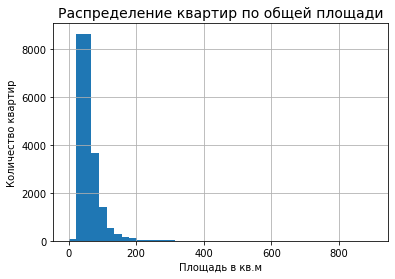

In [29]:
make_hist('total_area', 40, 0, 900, 'Распределение квартир по общей площади', 'Площадь в кв.м')

Мы видим, что большинство значений расположилось в диапазоне 0-200 м. Построим вторую гистограмму, чтобы изучить их более подробно.

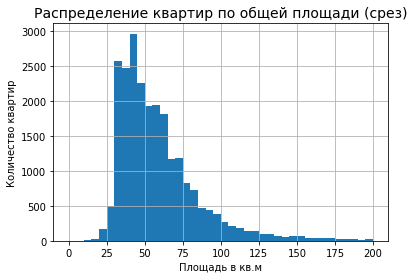

In [30]:
make_hist('total_area', 40, 0, 200, 'Распределение квартир по общей площади (срез)', 'Площадь в кв.м')

Пик продаж приходится на объекты площадью около 45 кв.м, которые могут быть и студиями, и однокомнатными, и двухкомнатными квартирами в зависимости от планировки. В основном люди приобретают квартиры площадью 35-65 кв.м, покупки квартир больше 80 кв.м уже редки (меньше 500 значений), после 300 кв.м. график сливается с осью абсцисс, что позволяет считать единичные значения в этом диапазоне (максимальное значение площади составляет 900 кв.м) статистическими выбросами. Число квартир площадью менее 25 кв.м и более 125 кв.м также невелико и может рассматриваться как выброс. Уберём эти значения из датафрейма.

In [31]:
data_filtered = df.query('25 <= total_area <= 125')

Построим также отдельные графики для жилой площади и площади кухни.

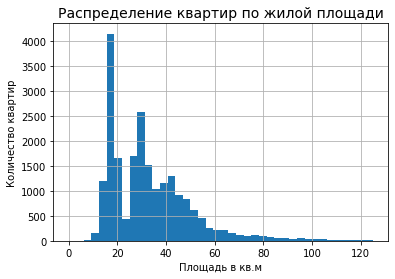

In [32]:
make_hist('living_area', 40, 0, 125, 'Распределение квартир по жилой площади', 'Площадь в кв.м')

На графике жилой площади, то есть спален и гостиных, выделяются два пика значений: 17-18 метров (однокомнатные квартиры и студии) и 30 метров (двухкомнатные квартиры). Провал на графике в районе 22 метров можно считать верхней границей жилой площади однокомнатных квартир, различие между "двушками" и "трёшками" не такое явное.

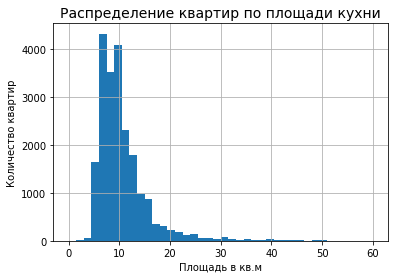

In [33]:
make_hist('kitchen_area', 40, 0, 60, 'Распределение квартир по площади кухни', 'Площадь в кв.м')

Стандартная кухня занимает от 6 до 11 метров, распределение значений близко к нормальному.

In [34]:
df.loc[:, ['total_area', 'kitchen_area', 'living_area']].corr()

,total_area,kitchen_area,living_area
total_area,1.000000,0.609121,0.939537
kitchen_area,0.609121,1.000000,0.428674
living_area,0.939537,0.428674,1.000000


Мы видим, что коэффициент корреляции общей площади и жилой очень высокий (0.94), что говорит о том, что эти величины увеличиваются пропорционально, а вот зависимость общей площади и площади кухни средняя (0.6) - в больших квартирах не всегда бывает просторная кухня.

### Анализ стоимости квартиры

In [35]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Самая дорогая квартира в датафрейме стоила 763 млн, самая дешёвая - 12 190 рублей (что похоже на ошибку). 75% квартир стоят в пределах 7 млн рублей. Возьмем диапазон стоимости от 1 до 12 млн и построим гистограмму.

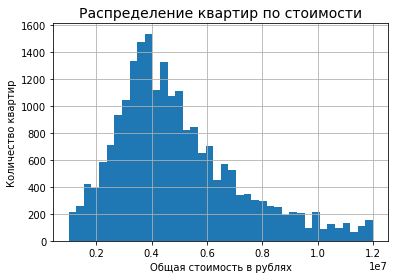

In [36]:
make_hist('last_price', 40, 1000000, 12000000, 'Распределение квартир по стоимости', \
          'Общая стоимость в рублях')

Как мы видим, основную часть продаж составляют квартиры стоимостью 3-5 млн. Для удобства сравнения построим также гистограмму стоимости одного квадратного метра.

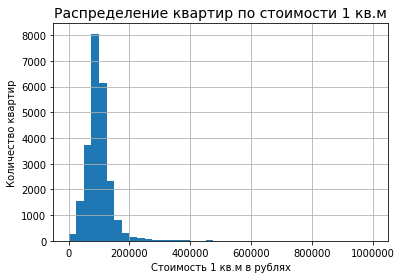

In [37]:
make_hist('price_per_m2', 40, 0, 1000000, 'Распределение квартир по стоимости 1 кв.м', \
          'Стоимость 1 кв.м в рублях')

Большая часть значений попадает в диапазон до 200000, увеличим масштаб в соответствии с этим.

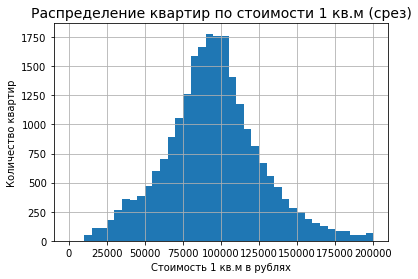

In [38]:
make_hist('price_per_m2', 40, 0, 200000, 'Распределение квартир по стоимости 1 кв.м (срез)', \
          'Стоимость 1 кв.м в рублях')

Большинство квартир продаётся по цене от 75 до 110 тыс. рублей за метр площади. Распределение цен соответствует нормальному.

Удалим редкие и выбивающиеся значения из датафрейма.

In [39]:
data_filtered = data_filtered.query('1000000 <= last_price <= 12000000')

### Анализ количества комнат

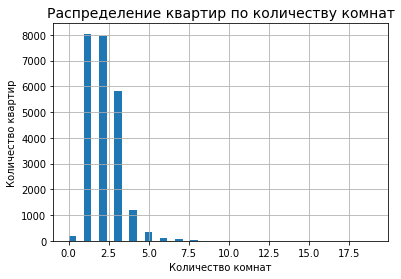

In [40]:
make_hist('rooms', 40, 0, df['rooms'].max(), 'Распределение квартир по количеству комнат', \
          'Количество комнат')

Судя по графику, наиболее активно продаются однокомнатные и двухкомнатные квартиры, с очень небольшой разницей в пользу первых. Четырехкомнатных квартир на рынке в разы меньше, а квартиры в 6-8 комнат и более совсем редки (возможно, выбросы). На графике также присутствует небольшой столбик квартир с нулем комнат - это может быть ошибка в данных либо обозначение студии. Уберем из таблицы квартиры, где больше 5 комнат.

In [41]:
data_filtered = data_filtered.query('rooms <= 5')

### Анализ высоты потолков

Мы помним, что в наших данных встречались аномальные значения высоты потолков 1 и 100 м. Для построения гистограммы зададим реалистичный диапазон - от 2 до 5 м высоты.

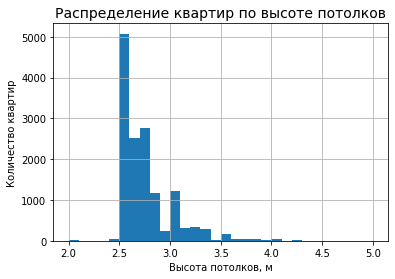

In [42]:
make_hist('ceiling_height', 30, 2, 5, 'Распределение квартир по высоте потолков', 'Высота потолков, м')

Распространенная высота потолков находится в диапазоне от 2,5 до 2,7 м, также выделяется небольшой пик на отметке 3 м ровно. Нестандартно высокие потолки встречаются редко, значения выше 3,5 м можно отнести к выбросам.

In [43]:
data_filtered = data_filtered.query('(ceiling_height.isnull()) or (2.5 <= ceiling_height <= 3.5)')

### Анализ времени продажи квартиры

In [44]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

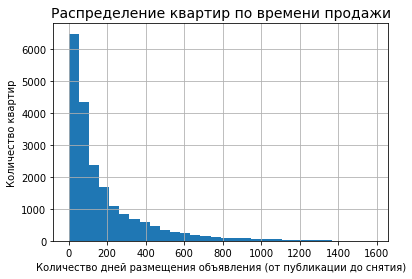

In [45]:
make_hist('days_exposition', 30, 0, 1580, 'Распределение квартир по времени продажи', \
          'Количество дней размещения объявления (от публикации до снятия)')

Судя по гистограмме, большинство продаж попадает в диапазон от 0 до 200. Среднее время продажи квартиры составляет 180 дней, медианное значение почти в два раза меньше - 95 дней. Величина стандартного отклонения по столбцу очень велика, то есть у нас есть ряд ультракоротких (от 1 дня) и ультрадлинных (до 4.3 лет) продаж, которые влияют на общую статистику. 

Text(0, 0.5, 'Количество дней')

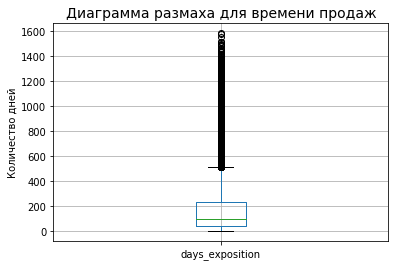

In [46]:
df.boxplot(column='days_exposition')
plt.title('Диаграмма размаха для времени продаж', fontsize=14)
plt.ylabel('Количество дней')

Диаграмма размаха показывает, что примерно на отметке 500 дней начинается тяжёлый хвост ультрадолгих продаж. Будем считать это число верхней границей. Посмотрим на другую гистограмму с диапазоном значений из первых двух квартилей.

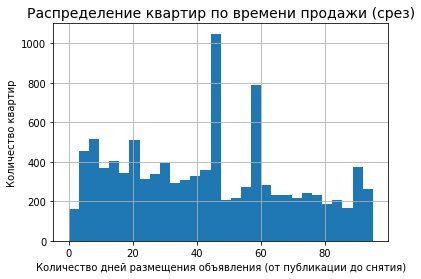

In [47]:
make_hist('days_exposition', 30, 0, 95, 'Распределение квартир по времени продажи (срез)', \
          'Количество дней размещения объявления (от публикации до снятия)')

Мы видим два пика значений - 45 и 60 дней. Все продажи, которые заняли меньше 40 дней, можно считать очень быстрыми.

Для дальнейшего анализа мы убрали из датафрейма аномальные значения площади, количества комнат, высоты потолков и общей стоимости квартиры.

In [48]:
(df.shape[0] - data_filtered.shape[0]) / df.shape[0] * 100

11.329591965905735

In [49]:
data_filtered.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,living_ratio,kitchen_ratio,weekday,month,year
count,21014.000000,2.101400e+04,21014.000000,21014.000000,12717.000000,20943.000000,19410.000000,21014.000000,19148.000000,21014.000000,15891.000000,15903.000000,15904.000000,6587.000000,15904.000000,7614.000000,18463.000000,21014.000000,19410.000000,19148.000000,21014.000000,21014.000000,21014.000000
mean,9.724517,4.907223e+06,53.375791,1.934092,2.678438,10.864346,30.532083,5.940563,9.640583,0.595984,28962.722170,15030.237251,0.552943,490.767117,0.705420,531.556475,173.273737,92774.370856,56.263766,18.973287,2.574141,6.402256,2017.383363
std,5.551617,2.203507e+06,18.193208,0.893344,0.199327,6.625563,13.075837,4.921217,3.821241,0.944616,12998.289777,8499.898784,0.761151,332.713647,0.888944,276.793046,211.363940,28785.988057,10.332061,7.099556,1.793881,3.490193,1.021112
min,0.000000,1.000000e+06,25.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,16.000000,1.000000,13483.146067,3.846154,4.352410,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,39.200000,1.000000,2.500000,5.000000,18.200000,2.000000,7.000000,0.000000,18040.000000,10667.000000,0.000000,290.500000,0.000000,315.000000,44.000000,75333.333333,49.253731,13.619045,1.000000,3.000000,2017.000000
50%,9.000000,4.480000e+06,50.000000,2.000000,2.600000,9.000000,29.300000,4.000000,9.000000,0.000000,27223.000000,13662.000000,0.000000,456.000000,0.000000,520.000000,92.000000,92976.844529,56.657224,17.539574,3.000000,6.000000,2017.000000
75%,14.000000,6.000000e+06,64.000000,3.000000,2.750000,16.000000,39.400000,8.000000,11.000000,1.000000,37780.000000,16722.000000,1.000000,614.000000,1.000000,741.000000,219.000000,109574.468085,63.499836,23.512280,4.000000,10.000000,2018.000000
max,50.000000,1.200000e+07,125.000000,5.000000,3.500000,60.000000,100.000000,33.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,100.000000,78.787879,6.000000,12.000000,2019.000000


Было удалено 11% строк. Зато теперь тяжёлые хвосты выбросов не влияют на показатели.

### Анализ факторов, влияющих на формирование цены

Построим матрицу корреляции, чтобы выяснить, зависит ли цена квартиры от площади, числа комнат и удалённости от центра. Также изучим зависимость цены от того, на каком этаже расположена квартира, и от даты размещения объявления о продаже.

In [50]:
(data_filtered[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
.corr()
.sort_values('last_price', ascending=False)
.style
.background_gradient(cmap="Greens"))

,last_price,total_area,rooms,cityCenters_nearest
last_price,1,0.702543,0.440322,-0.347308
total_area,0.702543,1,0.802097,-0.128649
rooms,0.440322,0.802097,1,-0.0781475
cityCenters_nearest,-0.347308,-0.128649,-0.0781475,1


- Коэффициент корреляции цены и площади высокий (0.7), что логично - чем больше квартира, тем она дороже, хотя есть варианты с дизайнерским ремонтом, которые даже с небольшим метражом будут стоить дорого. 
- Зависимость от количества комнат ниже средней (0.44), то есть цена квартиры растёт пропорционально увеличению числа комнат, но в половине случаев на неё оказывают решающее влияние другие факторы, к тому же, стоит учитывать квартиры с открытой планировкой (как мы видим, корреляция общей площади и числа комнат 0.8, то есть существуют квартиры с одной-двумя, но очень просторными комнатами или, наоборот, с большим количеством маленьких). 
- Наконец, наблюдаем слабую обратную зависимость цены от расстояния до центра города (-0.35): как правило, чем дальше от центра, тем недвижимость дешевле, но стоит учитывать, что в городе могут быть отдалённые районы с развитой инфраструктурой и хорошей экологией, где жильё будет стоить не меньше, чем в центре города.

Text(0.5, 0, 'Категория этажа')

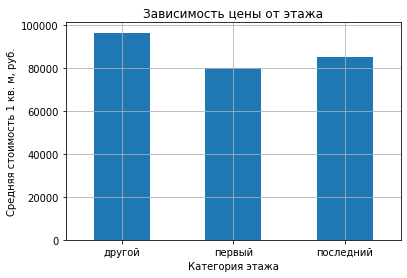

In [51]:
data_filtered.groupby('floor_category')['price_per_m2'].mean().plot(kind='bar', rot=0, \
                                        title='Зависимость цены от этажа', grid=True)
plt.ylabel('Средняя стоимость 1 кв. м, руб.')
plt.xlabel('Категория этажа')

Судя по графику выше, самые дешёвые квартиры на первом этаже: не все покупатели готовы мириться с меньшим количеством солнечного света из-за соседних домов и деревьев, высоким уровнем шума, отсутствием балкона и людьми, проходящими прямо перед окнами. На втором месте квартиры на последнем этаже, у которых тоже есть свои недостатки: тяжело подниматься, если в доме нет лифта, летом на верхних этажах жарко, зимой холодно, а после дождя может начать протекать крыша. Поэтому большинство людей предпочитает жить на промежуточных этажах, и рыночная цена за квадратный метр в этих квартирах самая высокая.

**Анализ зависимости стоимости от даты размещения объявления**

In [52]:
def make_plot(column, title, x): #напишем функцию для построения линейных графиков
    data_filtered.pivot_table(index=column, values='price_per_m2', aggfunc='mean') \
    .plot(grid=True, legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel(x)
    plt.ylabel('Цена за 1 кв.м, руб.')

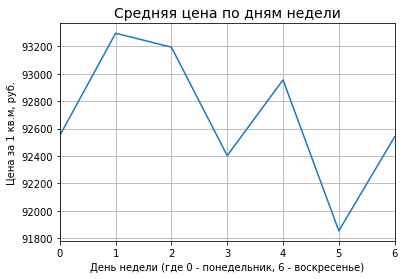

In [53]:
make_plot('weekday', 'Средняя цена по дням недели', 'День недели (где 0 - понедельник, 6 - воскресенье)')

<span style="color:blue">

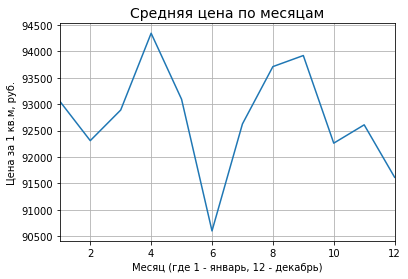

In [54]:
make_plot('month', 'Средняя цена по месяцам', 'Месяц (где 1 - январь, 12 - декабрь)')

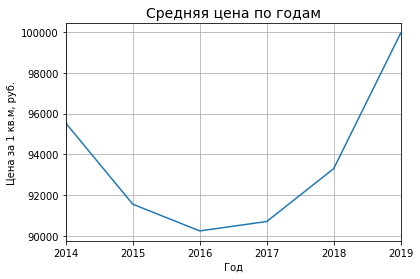

In [55]:
make_plot('year', 'Средняя цена по годам', 'Год')

Три графика выше иллюстрируют зависимость цены от даты размещения объявления. Как мы видим, дороже всего продались квартиры, которые были выставлены во вторник, среду и пятницу, а дешевле всего - субботние. Такое распределение выглядит скорее случайным и говорит об отсутствии прямой зависимости между днём размещения объявления о продаже квартиры и её итоговой стоимостью. График по годам демонстрирует падение стоимости одного квадратного метра с 2014 по 2016 год, что может быть связано с последствиями экономического кризиса и снижением платежеспособности населения. С 2017 года цены вновь начали расти. Цены на рынке недвижимости заметно проседают в июне, а вот наиболее дорого удается продать квартиру, выставленную в апреле или августе-сентябре. 

In [56]:
def make_scatter(column, title, xlable): #напишем функцию для построения диаграмм рассеяния
    data_filtered.plot(x=column, y='last_price', kind='scatter', alpha=0.09, grid=True)
    plt.title(title, fontsize=12)
    plt.xlabel(xlable)
    plt.ylabel('Стоимость квартиры, руб.')
    plt.tight_layout()

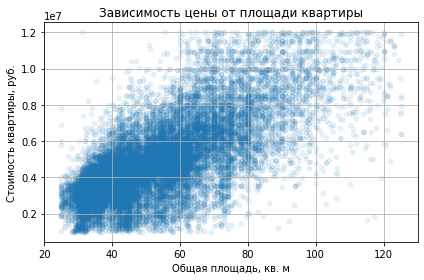

In [57]:
make_scatter('total_area', "Зависимость цены от площади квартиры", 'Общая площадь, кв. м')

Диаграмма рассеяния выше показывает, что между стоимостью квартиры и её площадью существует прямая зависимость: с увеличением метража (движение вправо по оси абсцисс) график смещается в сторону увеличения стоимости (движение вверх по оси ординат).

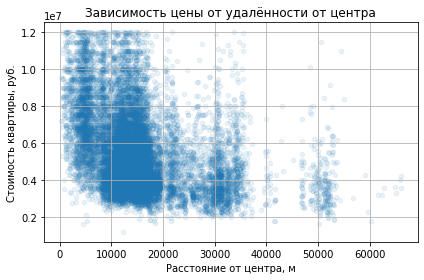

In [58]:
make_scatter('cityCenters_nearest', "Зависимость цены от удалённости от центра", \
             'Расстояние от центра, м')

Обратная зависимость между стоимостью квартиры и её удалённостью от центра существует, но не такая однозначная. Мы видим, что квартиры прямо в центре (в радиусе 5 км) стоят не меньше 4 млн, квартиры в отдаленных районах (от 20 км от центра) стоят в основном в пределах 6 млн, однако в радиусе 8-20 км от центра можно найти квартиру на любой бюджет: основная часть квартир стоит от 2,5 до 8 млн, но есть и более дорогие варианты.

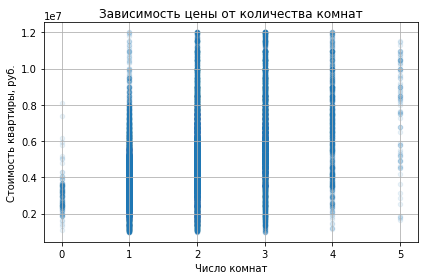

In [59]:
make_scatter('rooms', "Зависимость цены от количества комнат", 'Число комнат')

Данная диаграмма иллюстрирует среднюю зависимость между количеством комнат в квартире и её ценой. Направленность зависимости прямая: студии стоят в пределах 2-4 млн, для однокомнатных квартир цена выше 8 млн уже редка, четырёхкомнатные квартиры редко стоят меньше 2 млн, а пятикомнатные - не меньше 4, но между двухкомнатными и трёхкомнатными квартирами сложно увидеть разницу: среди них одинаково часто встречаются и очень дешёвые, и очень дорогие квартиры.

Проанализируем географические факторы на рынке недвижимости. Для начала отберём населённые пункты, по которым у нас больше всего данных.

In [60]:
top_10 = pd.DataFrame(data_filtered['locality_name'].value_counts().head(10))
display(top_10)

,locality_name
Санкт-Петербург,13528
поселок Мурино,522
поселок Шушары,433
Всеволожск,387
Колпино,333
Пушкин,330
поселок Парголово,324
Гатчина,300
деревня Кудрово,285
Выборг,219


In [61]:
data_filtered.query('locality_name in @top_10.index').pivot_table(index='locality_name', \
                    values='price_per_m2').sort_values(by='price_per_m2', ascending=False)

,price_per_m2
locality_name,
Санкт-Петербург,105600.725882
Пушкин,100451.004935
деревня Кудрово,92048.763109
поселок Парголово,90461.200175
поселок Мурино,84981.907116
поселок Шушары,78274.610020
Колпино,75146.010475
Гатчина,68922.356963
Всеволожск,67187.800193


Среди десяти городов-лидеров по числу объявлений самая высокая стоимость жилья, ожидаемо, в Санкт-Петербурге (в среднем около 106 тыс. за кв.м), самая низкая - в Выборге (в среднем 59 тыс. за кв.м).

Изучим подробнее данные по Санкт-Петербургу. Можно предположить, что в разных районах города стоимость квартир и факторы, оказывающие на неё влияние, различаются. Как мы помним, существует отрицательная корреляция между удалённостью квартиры от центра и её ценой. Попробуем выяснить, насколько цена за квадратный метр меняется в зависимости от расстояния.

In [62]:
spb_data = data_filtered.query('locality_name == "Санкт-Петербург"') 
#сделаем срез квартир в Санкт-Петербурге

In [63]:
spb_data['km_from_center'] = round(spb_data['cityCenters_nearest'] / 1000) 
#для каждой квартиры рассчитаем расстоянием до центра в километрах

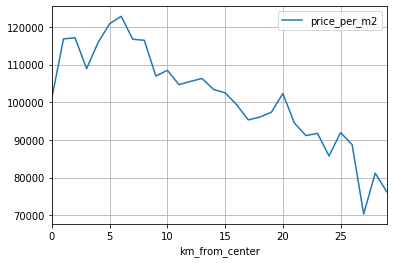

In [64]:
spb_data.pivot_table(index='km_from_center', values='price_per_m2').plot(grid=True)

На графике видно, что первые несколько километров цена флуктуирует, но на 9 км опускается ниже 110000 и начинает постоянно снижаться. Примем эту отметку за границу центра и снова проанализируем влияние площади, числа комнат, высоты потолков, этажности на стоимость квартир в этой зоне.

### Анализ стоимости квартир в центре Санкт-Петербурга

В этом разделе нам понадобится изучить много гистограмм с квартирами в центре Санкт-Петербурга и по всему городу, напишем функцию для автоматизации построения графиков.

In [65]:
def compare_hist(column, title, x):
    ax = spb_data.query('km_from_center > 9').plot(kind='hist', y=column, histtype='step', bins=30, 
                    linewidth=2, alpha=0.7, label='весь город')
    spb_data.query('km_from_center <= 9').plot(kind='hist', y=column, histtype='step', bins=30, 
                    linewidth=2, alpha=0.7, label='центр', ax=ax, grid=True, legend=True)
    plt.title(title, fontsize=14)
    plt.xlabel(x)
    plt.ylabel('Количество квартир')

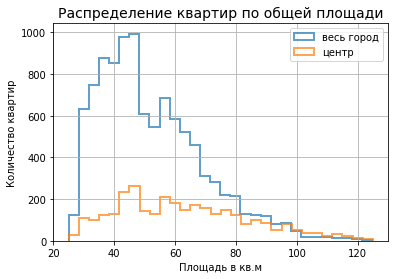

In [66]:
compare_hist('total_area', 'Распределение квартир по общей площади', 'Площадь в кв.м')

Судя по графику, по параметру общей площади квартиры в центре Санкт-Петербурга не сильно отличаются от остальных: наиболее часто встречаются объекты площадью около 45 и 60 кв.м, что также совпадает с данными по всем населённым пунктам.

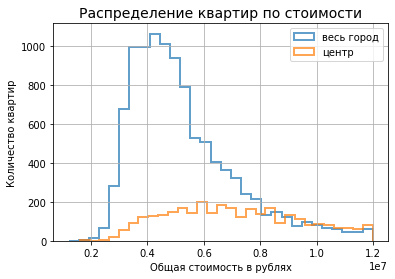

In [67]:
compare_hist('last_price', 'Распределение квартир по стоимости', 'Общая стоимость в рублях')

По цене различия более явные: "центральная" линия тяготеет к правым значениям дорогих квартир - от 6 млн рублей и выше, тогда как большинство квартир в остальном городе стоят дешевле - от 3 до 5,5 млн.

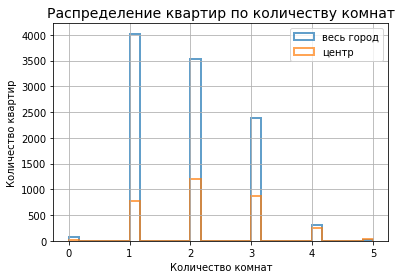

In [68]:
compare_hist('rooms', 'Распределение квартир по количеству комнат', 'Количество комнат')

В центральной зоне заметен спрос на квартиры с большим количеством комнат: тогда как в целом по городу лидируют "однушки", в центре двухкомнатные и трёхкомнатные квартиры покупают чаще.

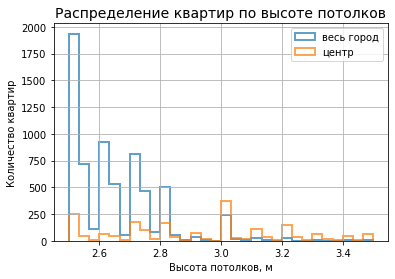

In [69]:
compare_hist('ceiling_height', 'Распределение квартир по высоте потолков', 'Высота потолков, м')

В центре лидируют трёхметровые потолки, что, вероятно, связано со стандартами планировки в домах исторической застройки. Стандартные потолки в 2,55 тоже встречаются нередко, но в целом потолки в центре выше.

Теперь проанализируем влияние вышеуказанных и других факторов на формирование стоимости квартир.

In [70]:
(spb_data.query('km_from_center <= 9').loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
.corr()['last_price']
.to_frame()
.sort_values('last_price', ascending=False)
.style
.background_gradient(cmap="Greens"))

,last_price
last_price,1
total_area,0.737918
rooms,0.483865
cityCenters_nearest,-0.306799


Посмотрим на матрицу корреляции для квартир в центральной зоне:
- Коэффициент корреляции цены и площади высокий, даже немного выше, чем в целом по выборке (0.74 против 0.7). Просторные квартиры могут продать ещё дороже из-за их местоположения.
- Зависимость от количества комнат ниже средней, но выше, чем в целом по выборке (0.48 против 0.43). Как мы выяснили, в центре продают больше квартир с несколькими комнатами.
- Обратная корреляция цены и расстояния до центра города чуть слабее, чем в общем (-0.31 против -0.35): в принципе, все квартиры в центральной зоне находятся в выгодном географическом положении.

Text(0.5, 0, 'Категория этажа')

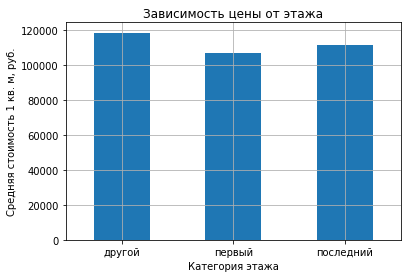

In [71]:
spb_data.query('km_from_center <= 9').groupby('floor_category')['price_per_m2'].mean().plot(kind='bar', \
                        title='Зависимость цены от этажа', grid=True, rot=0)
plt.ylabel('Средняя стоимость 1 кв. м, руб.')
plt.xlabel('Категория этажа')

Зависимость цены от этажа одинакова и в центре, и за его пределами: первые этажи - самые непопулярные и дешёвые, квартиры на промежуточных этажах - самые дорогие.

Проанализируем влияние даты размещения объявления на стоимость квартир в центральном районе Санкт-Петербурга.

In [72]:
def spb_cent_plot(column, title, x):
    spb_data.query('km_from_center <= 9').pivot_table(index=column, values='price_per_m2') \
    .plot(title=str(title) + '\n(для квартир в центре Санкт-Петербурга)', grid=True, legend=False)
    plt.xlabel(x)
    plt.ylabel('Цена за 1 кв.м, руб.')

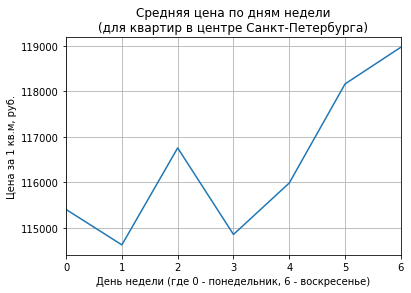

In [73]:
spb_cent_plot('weekday', 'Средняя цена по дням недели', \
              'День недели (где 0 - понедельник, 6 - воскресенье)')

Для квартир в центре график зависимости цены от дня недели размещения объявления получился прямо противоположный общему: самые дорогие квартиры были выставлены в выходные. Это подтверждает нашу предыдущую гипотезу о том, что день недели на самом деле не оказывает влияния на стоимость квартиры.

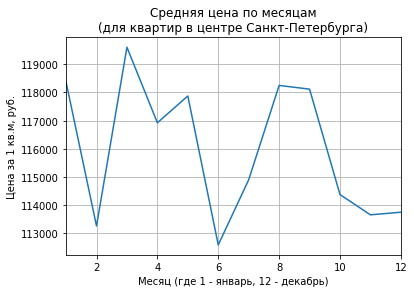

In [74]:
spb_cent_plot('month', 'Средняя цена по месяцам', 'Месяц (где 1 - январь, 12 - декабрь)')

Пик дороговизны в первом полугодии передвинулся на месяц назад, в март, во второй половине года статистика соответствует общей: самая высокая цена зафиксирована в августе и сентябре. Наиболее драматическое падение стоимости наблюдается, как в общем графике, в июне, а также в феврале.

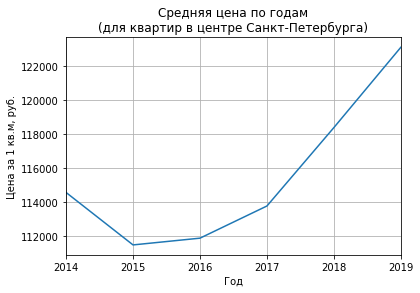

In [75]:
spb_cent_plot('year', 'Средняя цена по годам', 'Год')

Данные по годам примерно соответствуют статистике по всей выборке: в 2015 году наблюдалось падение цен, но стоимость квартир в центре начала расти уже в 2016 году (резкий рост начался с 2017, как и везде).

In [76]:
def spb_cent_scatter(column, title, xlable):
    spb_data.query('km_from_center <= 9').plot(x=column, y='last_price', kind='scatter', alpha=0.09, \
                         title=str(title) + '\n(для квартир в центре Санкт-Петербурга)', grid=True)
    plt.xlabel(xlable)
    plt.ylabel('Стоимость квартиры, руб.')
    plt.tight_layout()

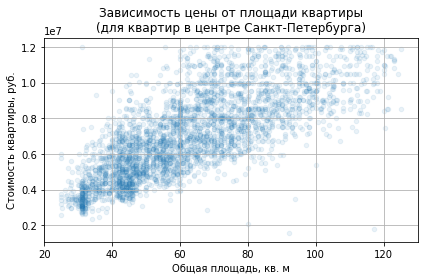

In [77]:
spb_cent_scatter('total_area', "Зависимость цены от площади квартиры", 'Общая площадь, кв. м')

Диаграмма рассеяния иллюстрирует прямую зависимость между ценой квартиры и её площадью: чем больше метраж, тем дороже становятся квартиры. В центре Санкт-Петербурга эта тенденция прослеживается даже более чётко, чем на общем графике.

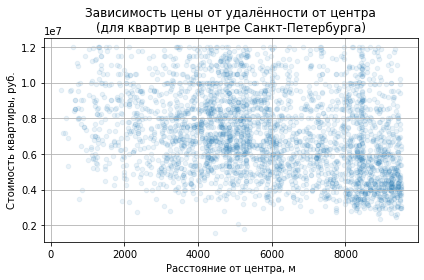

In [78]:
spb_cent_scatter('cityCenters_nearest', "Зависимость цены от удалённости от центра", \
             'Расстояние от центра, м')

На графике прослеживается общая тенденция к снижению цены с увеличением удалённости от центра: на первых двух километрах совсем мало квартир дешевле 6 млн рублей; после отметки 4 км появляется всё больше квартир стоимостью меньше 4 млн, особенно их много в "пограничной" зоне 8-9 км. Однако в целом точки распределены более-менее равномерно по всей области координат: все квартиры в центральном районе отличаются выгодным географическим положением.

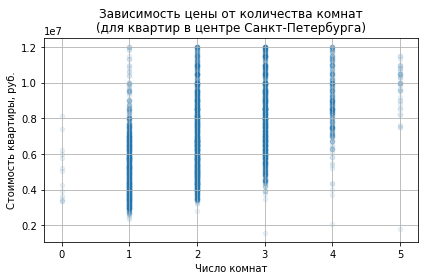

In [79]:
spb_cent_scatter('rooms', "Зависимость цены от количества комнат", 'Число комнат')

Судя по графику, зависимость стоимости квартиры от количества комнат для центра выше, чем в целом по выборке. Чётко вырисовывается минимальный порог: однокомнатные квартиры стоят от 2,5 млн, двухкомнатные - от 3,5 млн, трёхкомнатные - от 4 млн, четырёхкомнатные - от 6 млн, пятикомнатные - от 7,5 млн. Можно сделать вывод, что на стоимость квартиры в центральном районе Санкт-Петербурга фактор количества комнат оказывает значительное влияние.

### Вывод

По итогам анализа мы можем выделить следующие факторы, оказывающие самое сильное влияние на цену: этаж, на котором расположена квартира (на первом и последнем дешевле), величина общей площади и удалённость от центра (квартиры в центре стоят дороже). Для квартир в центральном районе важным фактором также является количество комнат (чем больше, тем дороже). Цены на недвижимость зависят от общей экономической ситуации и снижаются в годы кризиса, в течение года можно наблюдать сезонный спад цен на июньские квартиры и подъем цен в августе-сентябре. День недели, в который было размещено объявление о продаже, не оказывает никакого существенного влияния на стоимость квартиры.

## Общий вывод

Предоставленные данные позволяют нарисовать следующий портрет средней квартиры в Санкт-Петербурге и ближайших населённых пунктах: это однокомнатная или двухкомнатная квартира площадью 35-65 кв.м, стоимостью в пределах 12 млн рублей (в среднем 3-5 млн). В центре города квартиры обычно дороже (от 6 млн), в них больше комнат (две, три или четыре) и высокие потолки (от 3 м). Продается такая квартира в среднем за 95 дней. Квартиры на промежуточных этажах стоят дороже, чем на первом или последнем. Стоимость также зависит от расположения: из 10 населённых пунктов с самым большим количеством объявлений дешевле всего можно приобрести квартиру в Выборге (59 тыс. за кв. м), дороже всего - в самом Санкт-Петербурге (около 106 тыс. за кв.м).